## Import Libraries 

In [1]:
# Import Libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


## 1. Intensity Transformations

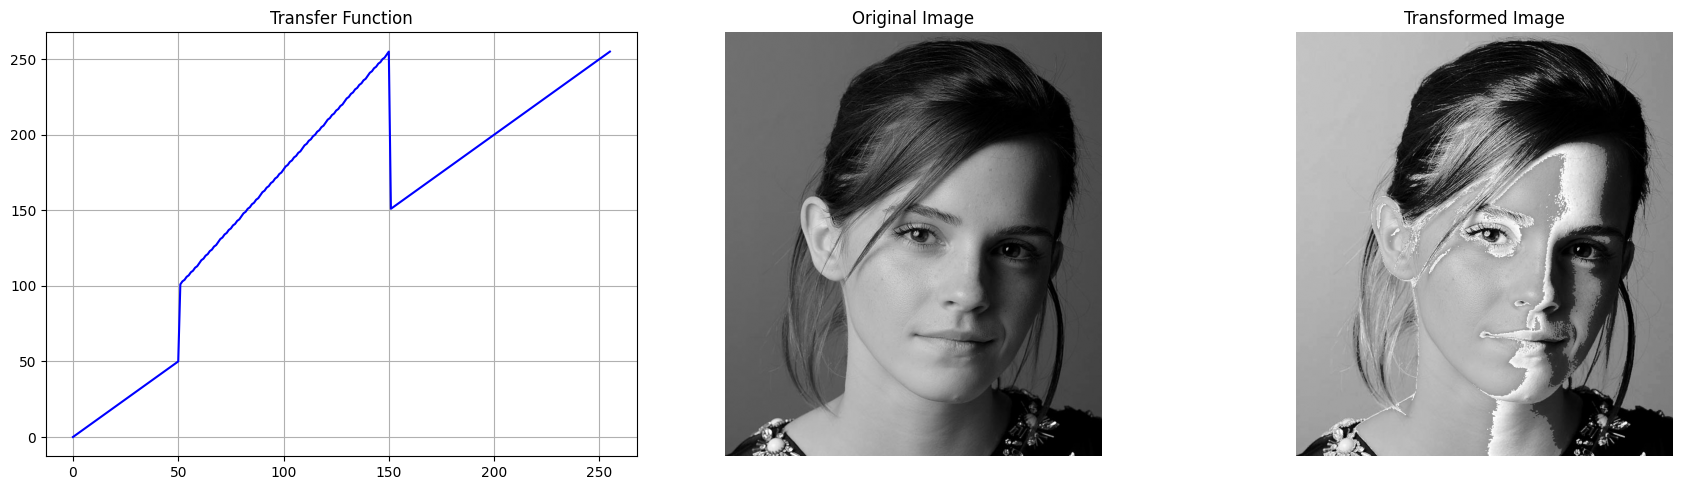

In [24]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[2,0] + 1 - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1],255,256-c[3,0]).astype('uint8')

T = np.concatenate((t1,t2[1:]),axis=0).astype('uint8')
T = np.concatenate((T,t3[1:]),axis=0).astype('uint8')

# Read Image
emma_img = cv.imread("a1images/emma.jpg", cv.IMREAD_GRAYSCALE )

# Apply Transfer Function
emma_img_transformed = T[emma_img] # or can use LUT function from OpenCV
#emma_img_transformed = cv.LUT(emma_img, T)


# Plotting the Results

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Plot Transfer Function
axs[0].plot(T, color='blue')
axs[0].set_title('Transfer Function')
axs[0].grid(True)

# Show Original Image
axs[1].imshow(emma_img, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Original Image')
axs[1].axis('off')

# Show Transformed Image
axs[2].imshow(emma_img_transformed, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Transformed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

## 2. Accentuate white matter and Gray matter

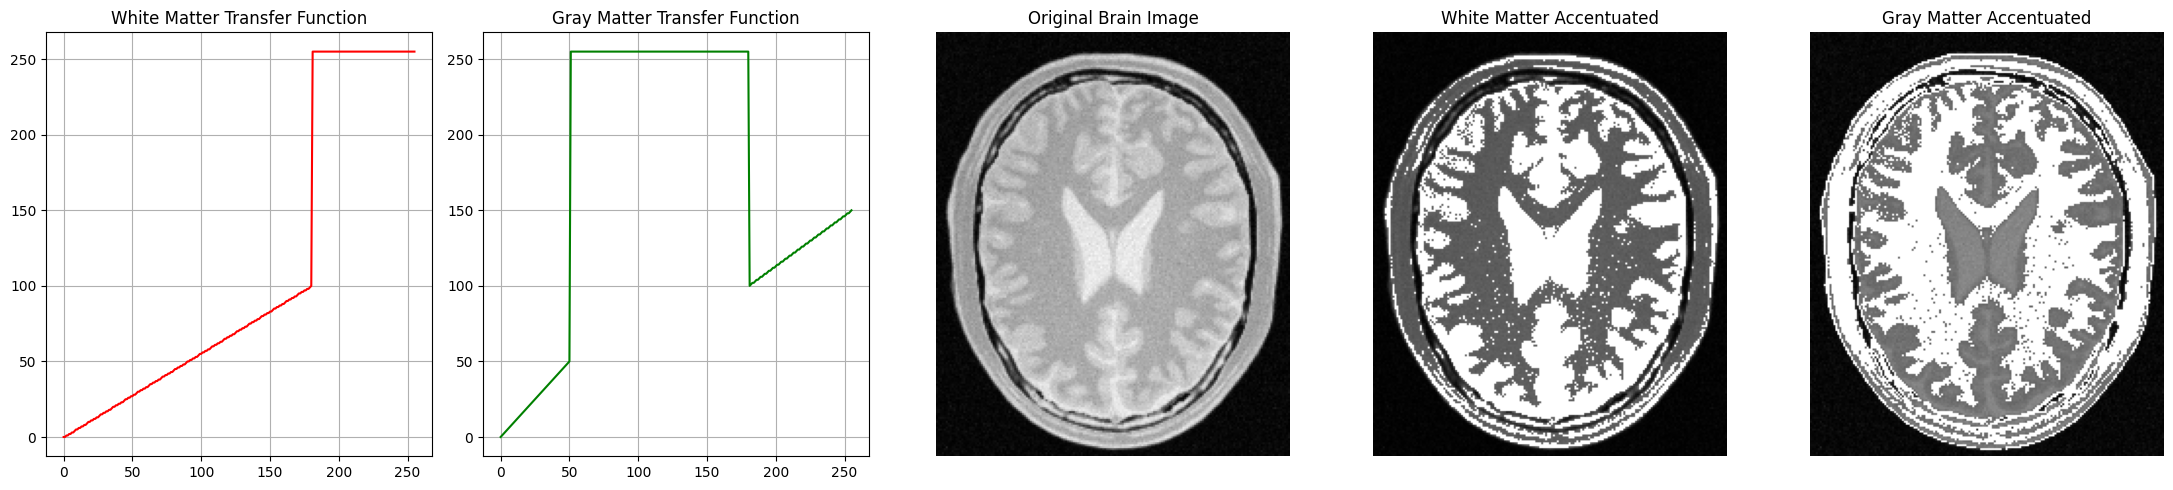

In [ ]:
brain_img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define Transfer Functions for White Matter and Gray Matter
W = np.array([(180,100),(180,255)])
G = np.array([(50,50),(50,255),(180,255),(180,100)])

tw_1 = np.linspace(0,W[0,1],W[0,0]+1-0).astype('uint8')
tw_2 = np.linspace(W[1,1],255,256-W[1,0]).astype('uint8')

tg_1 = np.linspace(0,G[0,1],G[0,0]+1-0).astype('uint8')
tg_2 = np.linspace(G[1,1],G[2,1],G[2,0]+1-G[1,0]).astype('uint8')
tg_3 = np.linspace(G[3,1],150,256-G[3,0]).astype('uint8')

# Concatenate the transfer functions
T_w = np.concatenate((tw_1,tw_2[1:]),axis=0).astype('uint8')
T_g = np.concatenate((tg_1,tg_2[1:],tg_3[1:]),axis=0).astype('uint8')

# Apply Transfer Functions
brain_img_white_matter = T_w[brain_img]
brain_img_gray_matter = T_g[brain_img]


#Plot the Results
fig, axs = plt.subplots(1, 5, figsize=(22, 5))

# Plot T_w (white matter transfer function)
axs[0].plot(T_w, color='red')
axs[0].set_title('White Matter Transfer Function')
axs[0].grid(True)

# Plot T_g (gray matter transfer function)
axs[1].plot(T_g, color='green')
axs[1].set_title('Gray Matter Transfer Function')
axs[1].grid(True)

# Show original brain image
axs[2].imshow(brain_img, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Original Brain Image')
axs[2].axis('off')

# Show white matter accentuated image
axs[3].imshow(brain_img_white_matter, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('White Matter Accentuated')
axs[3].axis('off')

# Show gray matter accentuated image
axs[4].imshow(brain_img_gray_matter, cmap='gray', vmin=0, vmax=255)
axs[4].set_title('Gray Matter Accentuated')
axs[4].axis('off')

plt.tight_layout()
plt.show()




## 3. Gamma Correction and Histrograms

### a) Gamma correction

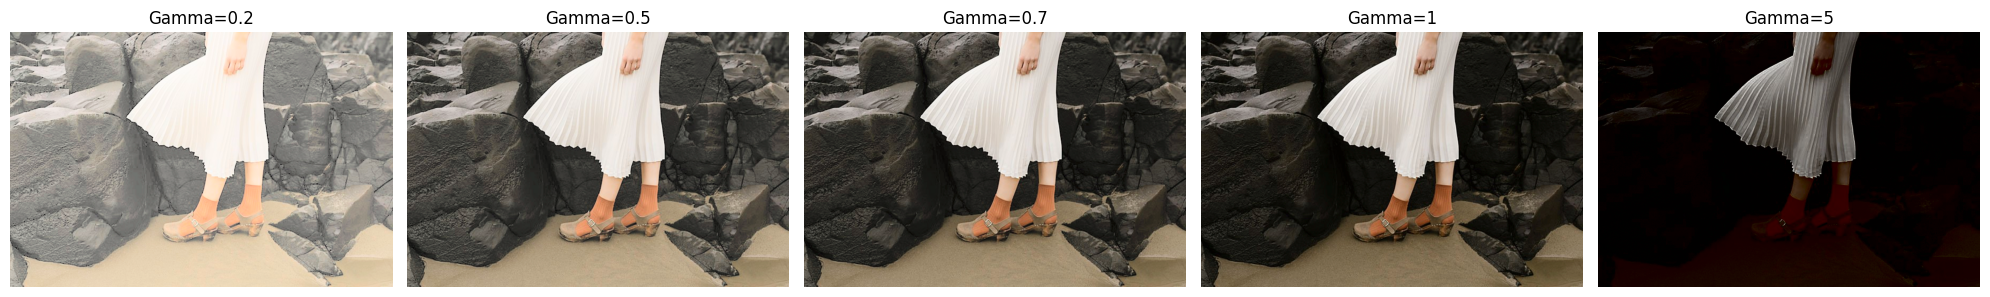

In [71]:
#Read the image for gamma correction
original_img = cv.imread("a1images/highlights_and_shadows.jpg")
img_lab_org = cv.cvtColor(original_img, cv.COLOR_BGR2LAB)

# Plot for different gamma values
gemma_values = [0.2, 0.5, 0.7, 1, 5]

fig, axs = plt.subplots(1, len(gemma_values), figsize=(20, 5))

for i, gamma in enumerate(gemma_values):

    G = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')

    #get copy of the image in LAB color space
    img_lab = img_lab_org.copy()

    # Add gamma correction
    img_lab[:,:,0] = G[img_lab[:,:,0]]

    #convert back to BGR
    img_corr = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)

    axs[i].imshow(cv.cvtColor(img_corr, cv.COLOR_BGR2RGB))
    axs[i].set_title(f'Gamma={gamma}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()



###  b) Histrograms

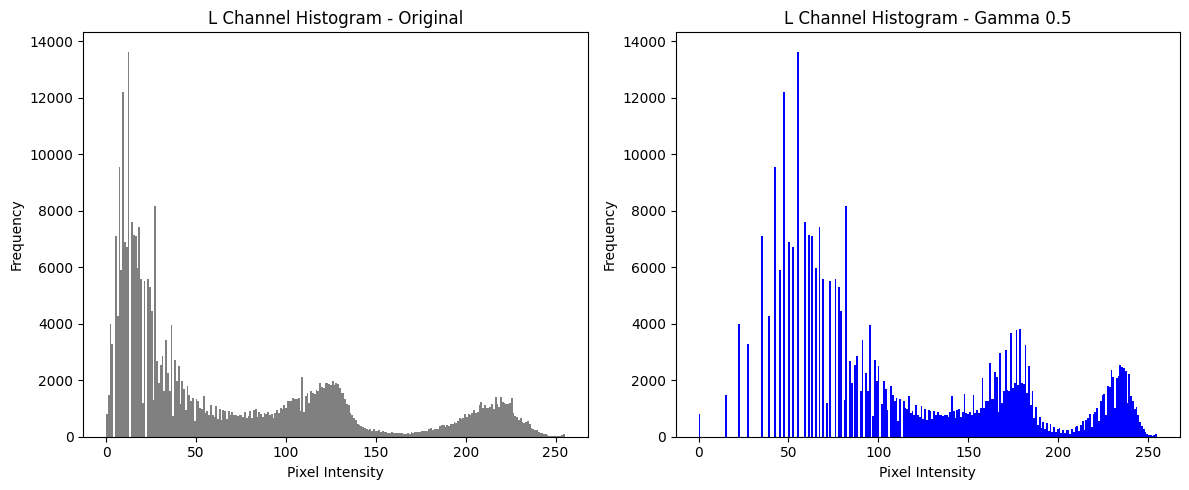

In [72]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read original image
original_img = cv.imread("a1images/highlights_and_shadows.jpg")
img_lab_orig = cv.cvtColor(original_img, cv.COLOR_BGR2LAB)

# Get L channel
L_original = img_lab_orig[:, :, 0]

# Apply gamma correction with gamma = 0.5
gamma = 0.5
G = np.array([((j / 255.0) ** gamma) * 255 for j in np.arange(0, 256)]).astype('uint8')

# Apply gamma correction to a copy
img_lab_gamma = img_lab_orig.copy()
L_gamma_corrected = G[L_original]

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(L_original.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("L Channel Histogram - Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.subplot(1, 2, 2)
plt.hist(L_gamma_corrected.ravel(), bins=256, range=(0, 255), color='blue')
plt.title("L Channel Histogram - Gamma 0.5")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
